#**Final Project**

By Nrupaja Vartak

##**Introduction**


In this project we will be predicting y using the 7 predictors. The predictors are x0, x1, x2, x3, x4, x5 and x6.

The dataset provided to me has 69827 rows and 8 columns. The dataset contains both categorical and numerical variables (x0, x1, x5 and x6 are categorical variables). The columns are of various datatypes, including float, object, and integer.

Importing the packages required for the project.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore
import warnings

In [71]:
#Setting Seaborn plot for formatting
sns.set()
sns.set_context('talk')
rcParams['figure.figsize'] = 7,5

In [72]:
#Disabling the warnings
warnings.filterwarnings('ignore')

##**Reading the Data**

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
#Reading the data
data_dir = "/content/drive/My Drive/Nrupaja.csv"
df = pd.read_csv(data_dir)

##**Initial Data Exploration**

In [75]:
df.shape

(69827, 8)

The original dataset contains 69827 rows and 8 columns.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69827 entries, 0 to 69826
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       69827 non-null  float64
 1   x0      69827 non-null  object 
 2   x1      68640 non-null  object 
 3   x2      65219 non-null  float64
 4   x3      69827 non-null  float64
 5   x4      69827 non-null  int64  
 6   x5      54116 non-null  object 
 7   x6      69827 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.3+ MB


The dataset is mixture categorical and numerical variables (x0, x1, x5 and x6 are categorical variables). The columns are of different datatypes, i.e., float, object and integer. We can also see there are a lot of missing values in x5 and a few in x2.

Let us look at the dataset now.

In [77]:
df.head(10)

y  x0  x1     x2     x3  x4   x5  x6
0  0.012  A0  A0    0.0  100.0   0   A0  A0
1  8.790  A1  A1  177.0  150.0   6   A1  A1
2  1.000  A2  A1    0.0    5.0   9  NaN  A1
3  1.800  A3  A1    0.0  150.0   8   A2  A0
4  7.200  A2  A2   71.0   50.0   2  NaN  A1
5  1.400  A0  A1   55.0    5.0   1   A0  A0
6  3.000  A3  A1   75.0  100.0   3   A2  A1
7  9.890  A4  A2  102.0  150.0   9   A1  A1
8  2.799  A1  A1  101.0  125.0  10  NaN  A1
9  0.850  A5  A1    0.0  150.0  11   A1  A1

Now checking the number of unique values each column has.

In [78]:
df.nunique()

y     2745
x0       9
x1       3
x2     481
x3      18
x4      13
x5       8
x6       3
dtype: int64

In [79]:
df.describe().round(2)

y        x2        x3        x4
count   69827.00  65219.00  69827.00  69827.00
mean        8.40    115.61    125.27      5.72
std       393.96    190.85     40.81      3.72
min     -4040.75      0.00   -564.68      0.00
25%         1.19     70.00    100.00      3.00
50%         2.99    105.00    150.00      6.00
75%         7.25    150.00    150.00      9.00
max    100000.00  17011.00    876.52     12.00

There is a vast difference between the maximum and minimum values for y. Also about 75% of the data in y is just till 7.5. This means there are a lot of outliers. Also in the case of x3, the median and the third quantile is the same number! 

Applying z-score normalization to get a better understanding of the dataset.

In [80]:
def zscore(x):
  return (x - x.mean())/x.std()
dfz = df[['y','x2','x3','x4']].apply(zscore)
dfz.describe(percentiles=[]).round(1)

y       x2       x3       x4
count  69827.0  65219.0  69827.0  69827.0
mean      -0.0      0.0     -0.0      0.0
std        1.0      1.0      1.0      1.0
min      -10.3     -0.6    -16.9     -1.5
50%       -0.0     -0.1      0.6      0.1
max      253.8     88.5     18.4      1.7

There is probably a lot of bad data in y, x2 and x3!

Let us now check the data of our categorical varibales.

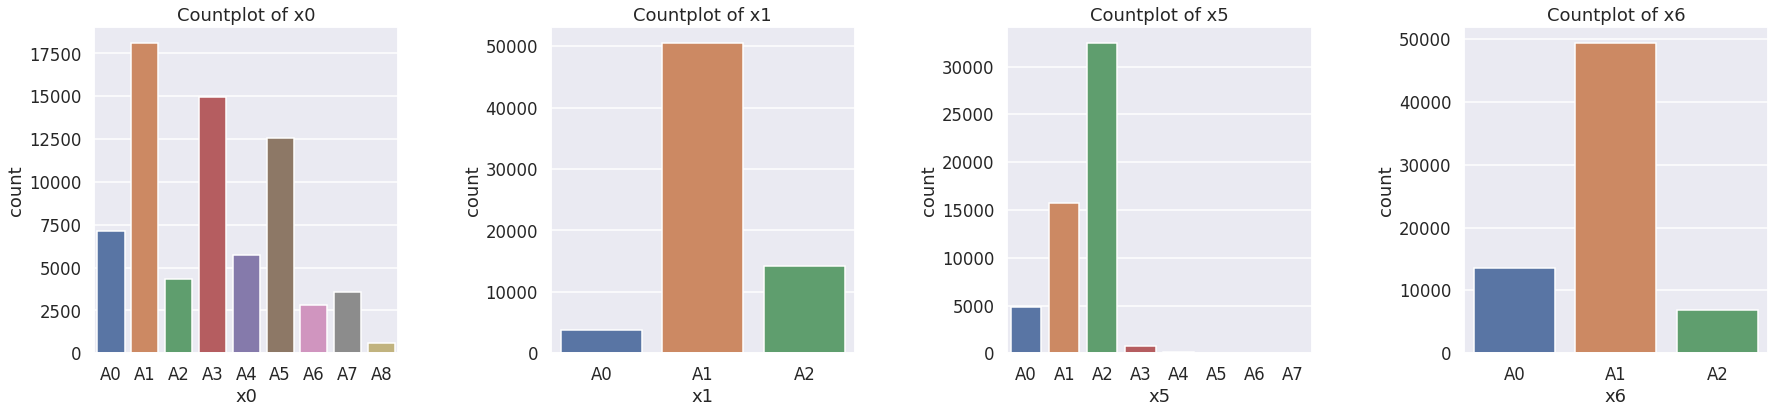

In [81]:
fig = plt.figure(figsize=(30, 6))
fig.subplots_adjust(left=None, bottom= None, right=None, top=None, wspace=0.5)
plt.subplot(1,4,1)
sns.countplot(x=df['x0'])
plt.title('Countplot of x0')
plt.subplot(1,4,2)
sns.countplot(x=df['x1'])
plt.title('Countplot of x1')
plt.subplot(1,4,3)
sns.countplot(x=df['x5'])
plt.title('Countplot of x5')
plt.subplot(1,4,4)
sns.countplot(x=df['x6'])
plt.title('Countplot of x6');

There is a lot of imbalanced data in x1, x5 and x6!

Let us now look at the data of the numerical variables.

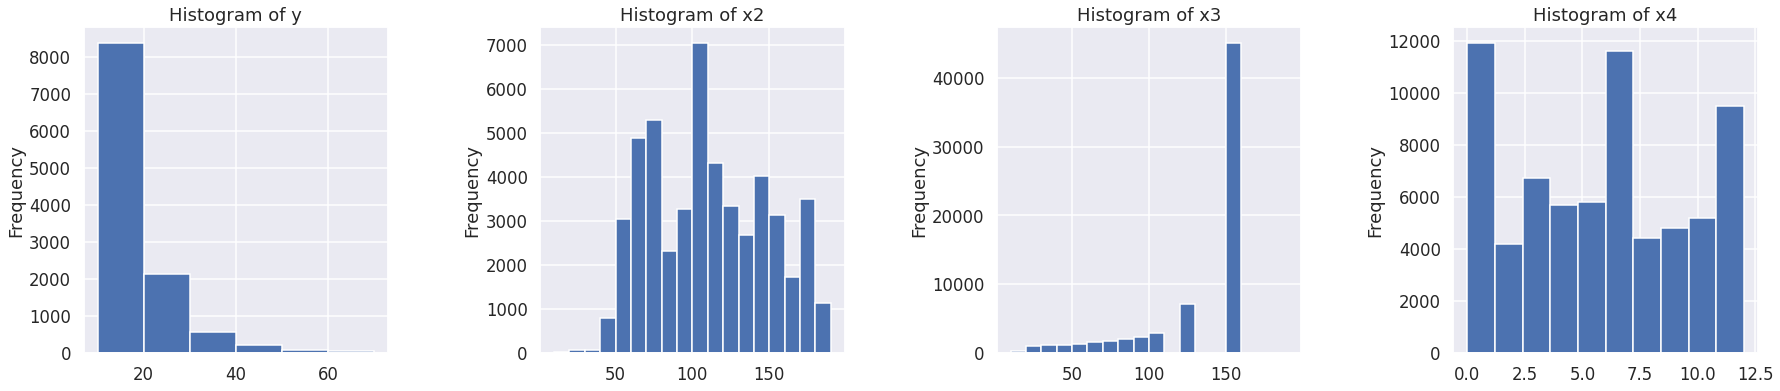

In [82]:
fig = plt.figure(figsize=(30, 6))
fig.subplots_adjust(left=None, bottom= None, right=None, top=None, wspace=0.5)
plt.subplot(1,4,1)
df['y'].plot.hist(bins=list(range(10,80,10)))
plt.title('Histogram of y')
plt.subplot(1,4,2)
df['x2'].plot.hist(bins=list(range(10,200,10)))
plt.title('Histogram of x2')
plt.subplot(1,4,3)
df['x3'].plot.hist(bins=list(range(10,200,10)))
plt.title('Histogram of x3')
plt.subplot(1,4,4)
df['x4'].plot.hist()
plt.title('Histogram of x4');

x3 has a lot if imbalanced data, we will probably drop it later as it is of no use! The values of x2 and x4 look good and kind of balanced. y is also very imbalanced!

Let us now make box plots for the numerical variables.

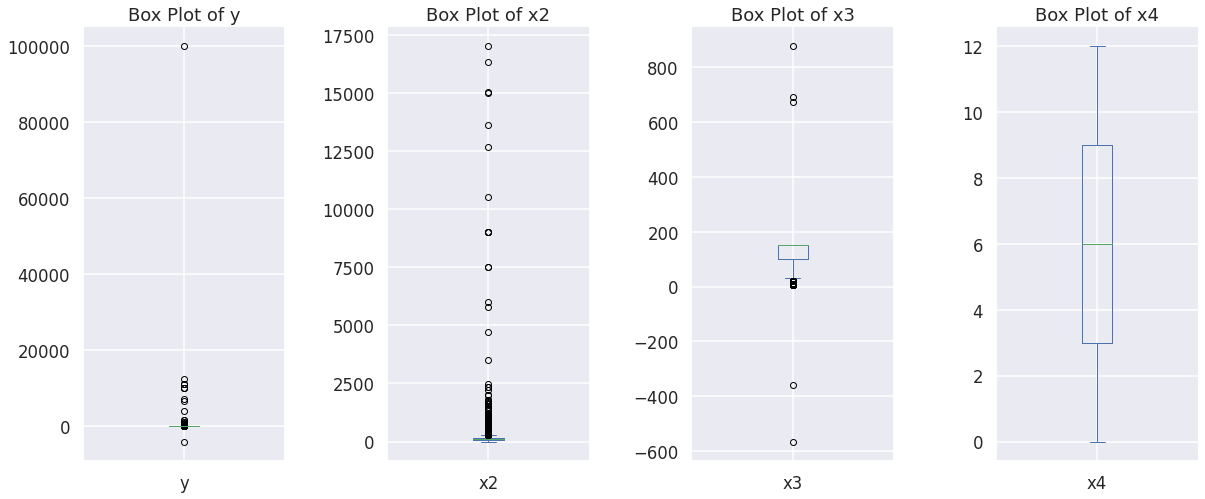

In [83]:
fig = plt.figure(figsize=(20, 8))
fig.subplots_adjust(left=None, bottom= None, wspace=0.5)
plt.subplot(1,4,1);
df['y'].plot.box()
plt.title('Box Plot of y');
plt.subplot(1,4,2);
df['x2'].plot.box()
plt.title('Box Plot of x2');
plt.subplot(1,4,3);
df['x3'].plot.box()
plt.title('Box Plot of x3');
plt.subplot(1,4,4);
df['x4'].plot.box()
plt.title('Box Plot of x4');

These are some bad box plots! This means there are a lot of outliers and bad data. We will take care of this later on. 
The plot of x4 looks perfect with 6 as its median.

Checking the NA values in the dataset.

In [84]:
df.isna().sum()

y         0
x0        0
x1     1187
x2     4608
x3        0
x4        0
x5    15711
x6        0
dtype: int64

Checking the dataset for empty values!

In [85]:
(df.select_dtypes(include='object') == "").sum()

x0    0
x1    0
x5    0
x6    0
dtype: int64

Now checking the dataset for 'Unknown' values.

In [86]:
(df.select_dtypes(include='object') == "Unknown").sum()

x0    0
x1    0
x5    0
x6    0
dtype: int64

##**Data Preprocessing**

Cleaning the bad and missing data.

###Bad Data

####For Target Variable

Checking for outliers in 'y' now. 

In [87]:
(df['y'] > 19).mean()

0.0525584659229238

In [88]:
(df['y'] < 0).sum()

1

Only about 5% of the values in the data lies above 19 and only 1 value is below 0, so will now drop them.

In [89]:
outliers = df.index[(df['y'] > 19) | (df['y'] < 0)]
df = df.drop(outliers)

In [90]:
df['y'].describe()

count    66156.000000
mean         4.330806
std          4.355876
min          0.000000
25%          1.099000
50%          2.700000
75%          6.299000
max         19.000000
Name: y, dtype: float64

Now the 'y' looks much better!

####For Predictor Variables

Checking for outliers in 'x2' now. 

In [91]:
(df['x2'] > 210).mean()

0.05299594896910333

In [92]:
(df['x2'] < 0).sum()

0

Only about 5% of the values in the data lies above 210 and there are 0 values below 0, so will now drop them.

In [93]:
x2_outliers = df.index[(df['x2'] > 210) | (df['x2'] < 0)]
df = df.drop(x2_outliers)

In [94]:
df['x2'].describe()

count    58299.000000
mean        97.262732
std         52.360226
min          0.000000
25%         65.000000
50%        101.000000
75%        136.000000
max        210.000000
Name: x2, dtype: float64

'x2' also looks better now!

Dropping 'x3' because has lots of imbalanced data and we wont be needing it as such.

In [95]:
df.drop(['x3'], axis=1, inplace=True)

###Missing Data

We will consider the '0's in 'x2' as bad data as the other values in the column are higher! So we will convert the '0's to NAs. 

In [96]:
df['x2'].replace(0, np.nan, inplace=True)

Let us now look at the average NA values in the dataset.

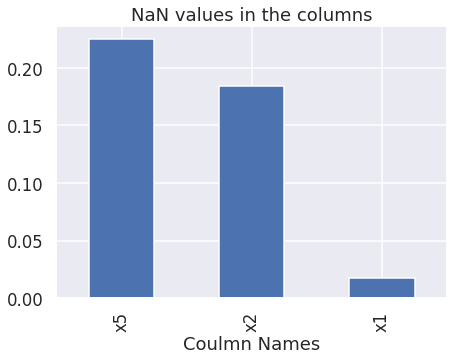

In [97]:
na_frac = df.isna().mean().sort_values(ascending=False)
na_frac[na_frac > 0.0].round(3).plot.bar()
plt.title('NaN values in the columns')
plt.xlabel('Coulmn Names')
plt.ylabel('');

Replacing the missing data in the numerical variables by the median.

In [98]:
values = {'x2': df['x2'].median(), 'x4': df['x4'].median()}
df.fillna(value=values, inplace=True)

Now replacing the missing values with mode for the categorical variables.

In [99]:
values1 = df['x1'].value_counts().index[0]
df.fillna({'x1' : values1}, inplace=True)

values2 = df['x5'].value_counts().index[0]
df.fillna({'x5' : values2}, inplace=True)

In [100]:
df.isna().sum()

y     0
x0    0
x1    0
x2    0
x4    0
x5    0
x6    0
dtype: int64

There are no NA values in the dataset now.

In [101]:
df.describe().round(2)

y        x2        x4
count  62650.00  62650.00  62650.00
mean       4.02    109.84      5.67
std        4.10     36.32      3.74
min        0.00      1.00      0.00
25%        1.00     85.00      3.00
50%        2.50    105.00      6.00
75%        5.75    133.00      9.00
max       19.00    210.00     12.00

In [102]:
def zscore(x):
  return (x - x.mean())/x.std()
dfz = df[['y','x2','x4']].apply(zscore)
dfz.describe(percentiles=[]).round(1)

y       x2       x4
count  62650.0  62650.0  62650.0
mean      -0.0     -0.0     -0.0
std        1.0      1.0      1.0
min       -1.0     -3.0     -1.5
50%       -0.4     -0.1      0.1
max        3.7      2.8      1.7

The values look a lot better now!

##**Data Exploration and Visualization**

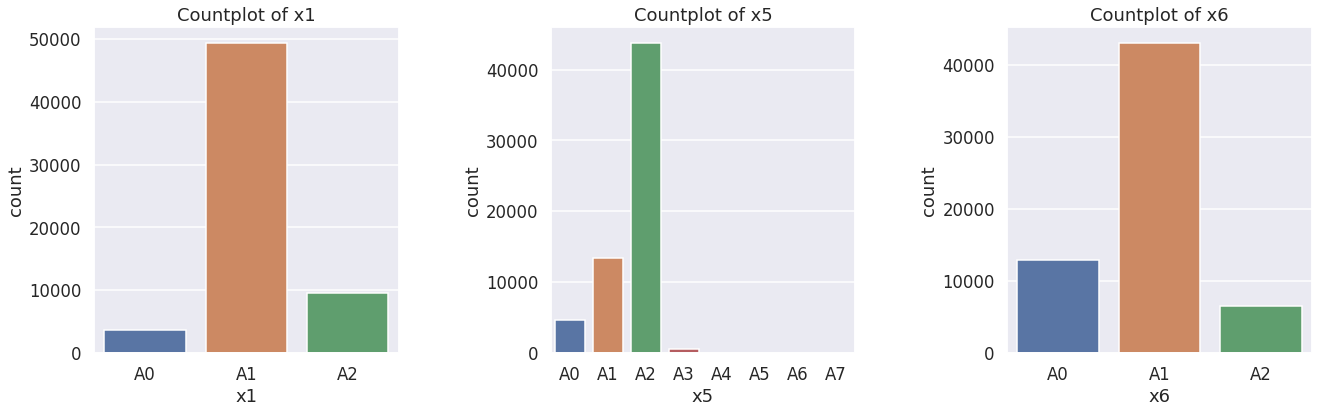

In [103]:
fig = plt.figure(figsize=(30, 6))
fig.subplots_adjust(left=None, bottom= None, right=None, top=None, wspace=0.5)
plt.subplot(1,4,1)
sns.countplot(x=df['x1'])
plt.title('Countplot of x1')
plt.subplot(1,4,2)
sns.countplot(x=df['x5'])
plt.title('Countplot of x5')
plt.subplot(1,4,3)
sns.countplot(x=df['x6'])
plt.title('Countplot of x6');

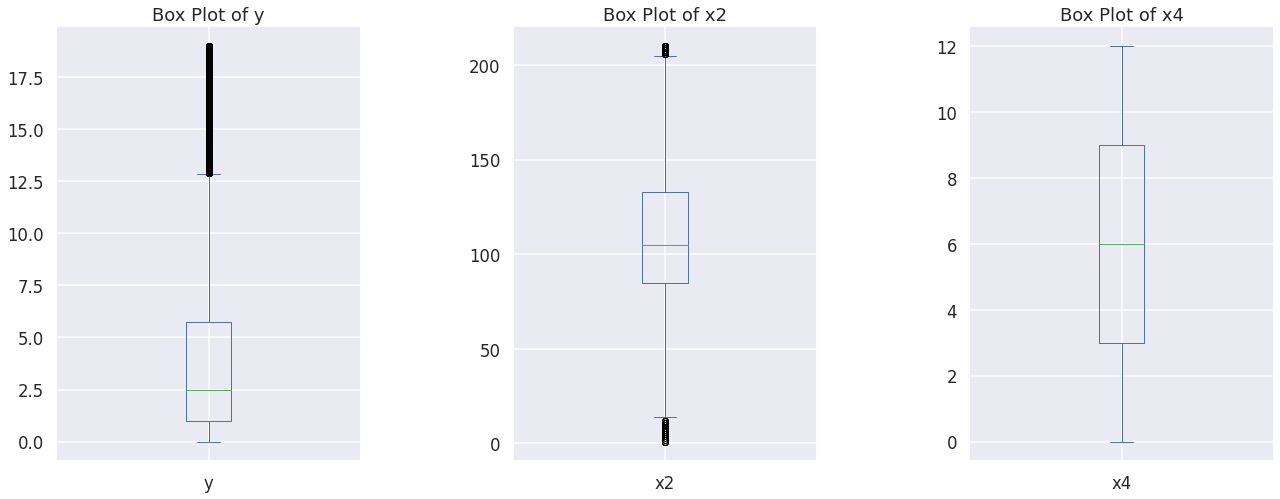

In [104]:
fig = plt.figure(figsize=(30, 8))
fig.subplots_adjust(left=None, bottom= None, right=None, top=None, wspace=0.5)
plt.subplot(1,4,1);
df['y'].plot.box()
plt.title('Box Plot of y');
plt.subplot(1,4,2);
df['x2'].plot.box()
plt.title('Box Plot of x2');
plt.subplot(1,4,3);
df['x4'].plot.box()
plt.title('Box Plot of x4');

After cleaning the data, our box plots looks much better! There are certain outliers but we will keep those.

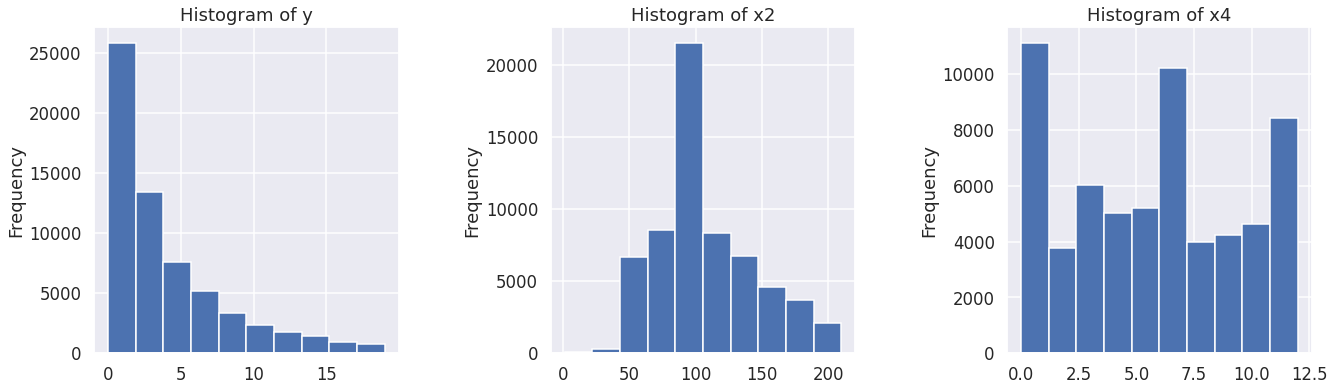

In [105]:
fig = plt.figure(figsize=(30, 6))
fig.subplots_adjust(left=None, bottom= None, right=None, top=None, wspace=0.5)
plt.subplot(1,4,1)
df['y'].plot.hist()
plt.title('Histogram of y')
plt.subplot(1,4,2)
df['x2'].plot.hist()
plt.title('Histogram of x2')
plt.subplot(1,4,3)
df['x4'].plot.hist()
plt.title('Histogram of x4');

There is still a lot of imbalanced data 'y' and 'x2'.

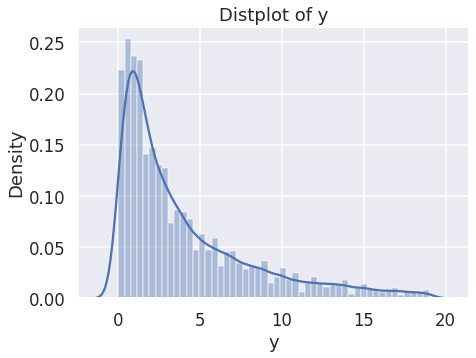

In [106]:
sns.distplot(df['y'])
plt.title("Distplot of y");

More than half of the values in y are less than 5!

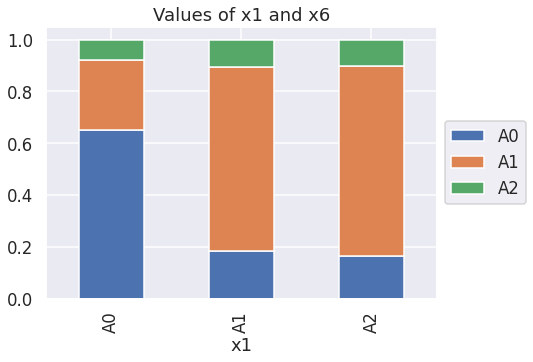

In [107]:
tbl = pd.crosstab(df['x1'], df['x6'], normalize='index')
tbl.plot.bar(stacked=True)
plt.title("Values of x1 and x6")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

Most of the A0 values lie in the A0 column. A2 is very less.

##**Machine Learning**

Let's convert categorical variables to numerical variables

In [108]:
df['x0'] = df['x0'].astype('category').cat.codes
df['x1'] = df['x1'].astype('category').cat.codes
df['x5'] = df['x5'].astype('category').cat.codes
df['x6'] = df['x6'].astype('category').cat.codes

###KNN Regression

Setting precdictors and target variables.

In [109]:
predictors = ['x0', 'x1', 'x2', 'x4', 'x5', 'x6']
target = 'y'
X = df[predictors].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Scaling the data now

In [110]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

Performing Grid Search with Cross Validation to determine the best hyperparameters for our model.

In [50]:
grid = [ {'n_neighbors':range(3,22,2), 'p':[1,2], 'weights' : ['uniform','distance']}]
knnCV = GridSearchCV(KNeighborsRegressor(), grid, cv=10,
scoring='neg_mean_squared_error')
knnCV.fit(X_train, y_train)
knnCV.best_params_

{'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}

In [51]:
knn = KNeighborsRegressor(n_neighbors=21, p= 1, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=21, p=1)

In [52]:
y_pred_train = knn.predict(X_train)
train_rmse = np.sqrt((y_pred_train - y_train)**2).mean()
print('Blind Prediction : {:.2f}'.format(y_train.mean()))
print('Train MSE: {:.2f}'.format(train_rmse))

Blind Prediction : 4.01
Train MSE: 2.28


In [53]:
y_pred = knn.predict(X_test)
test_rmse = np.sqrt(((y_pred - y_test)**2).mean())
print('Test RMSE: {:.2f}'.format(test_rmse))

Test RMSE: 3.38


This is bad as its greater than the train RMSE.

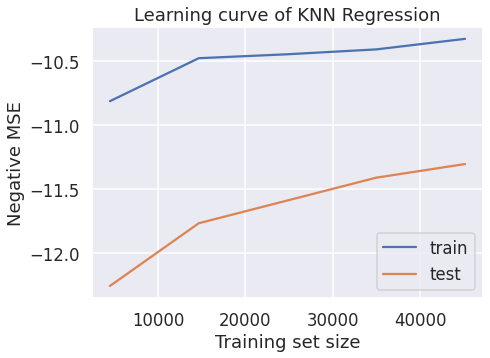

In [54]:
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train');
plt.plot(train_sizes, test_scores_mean, label='test');
plt.title('Learning curve of KNN Regression');
plt.xlabel('Training set size');
plt.ylabel('Negative MSE');
plt.legend();

This has high variance.

###Linear Regression

In [55]:
predictors = ['x0', 'x1', 'x2', 'x4', 'x5', 'x6']
target = 'y'
X = df[predictors].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Performing Grid Search with Cross Validation to determine the best hyperparameters for our model.

In [56]:
grid = [ {'copy_X': [True,False], 'fit_intercept': [True,False]}]
linCV = GridSearchCV(LinearRegression(), grid, cv=10, scoring='neg_mean_squared_error')
linCV.fit(X_train, y_train)
linCV.best_params_

{'copy_X': True, 'fit_intercept': True}

In [57]:
regr = LinearRegression(copy_X=True, fit_intercept=True)
regr.fit(X_train, y_train)

LinearRegression()

Getting the Intercept and the Coefficients.

In [58]:
print('y = {:.2f} + {:.2f}*x0 + {:.2f}*x1 + {:.2f}*x2 + {:.2f}*x4 + {:.2f}*x5 + {:.2f}*x6' .format(regr.intercept_, regr.coef_[0], regr.coef_[1],  regr.coef_[2], regr.coef_[3],  regr.coef_[4], regr.coef_[5]))

y = -1.83 + 0.15*x0 + 0.94*x1 + 0.04*x2 + 0.08*x4 + -0.29*x5 + 0.02*x6


Getting the Blind Prediction.

In [59]:
y_pred = regr.predict(X_test)

print('Blind Prediction : {:.2f}'.format(y_train.mean()))


Blind Prediction : 4.00


In [60]:
y_pred = regr.predict(X_test)
test_rmse = np.sqrt(((y_pred - y_test)**2).mean())
print('test RMSE: {:.2f}'.format(test_rmse))

test RMSE: 3.70


This is good as it is less than the Blind Prediction.

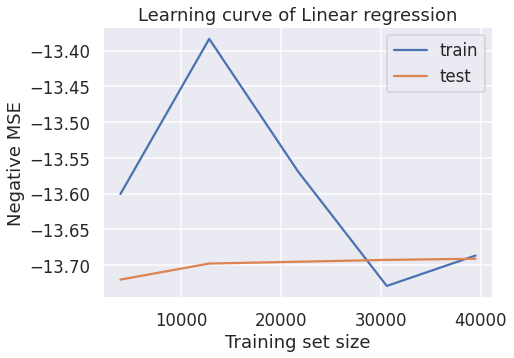

In [61]:
train_sizes, train_scores, test_scores = learning_curve(regr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train');
plt.plot(train_sizes, test_scores_mean, label='test');
plt.title('Learning curve of Linear regression');
plt.xlabel('Training set size');
plt.ylabel('Negative MSE');
plt.legend();

This is a bad curve.

###Decision Tree Regression

In [62]:
predictors = ['x0', 'x1', 'x2', 'x4', 'x5', 'x6']
target = 'y'
X = df[predictors].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Performing Grid Search with Cross Validation to determine the best hyperparameters for our model.

In [63]:
grid = [ {'max_depth' : range(3,22,2), "random_state": range(3,22,2)}]
linCV = GridSearchCV(DecisionTreeRegressor(), grid, cv=10, scoring='neg_mean_squared_error')
linCV.fit(X_train, y_train)
linCV.best_params_

{'max_depth': 11, 'random_state': 9}

Training the model.

In [64]:
regr = DecisionTreeRegressor(max_depth=11, random_state=0)
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=0)

Predicting the training RMSE

In [65]:
y_pred_train = regr.predict(X_train)
train_mse = np.sqrt((y_pred_train - y_train)**2).mean()
print('Blind Prediction : {:.2f}'.format(y_train.mean()))
print('Train RMSE: {:.2f}'.format(train_mse))

Blind Prediction : 4.01
Train RMSE: 2.15


In [66]:
y_pred = regr.predict(X_test)
test_rmse = np.sqrt(((y_pred - y_test)**2).mean())
print('Test RMSE: {:.2f}'.format(test_rmse))

Test RMSE: 3.32


In [67]:
regr.score(X_test, y_test)

0.35648973060490974

In [68]:
dot_data = export_graphviz(regr, precision=2, feature_names=predictors, proportion=True, filled=True, rounded=True)

# plot it
graph = graphviz.Source(dot_data)
graph

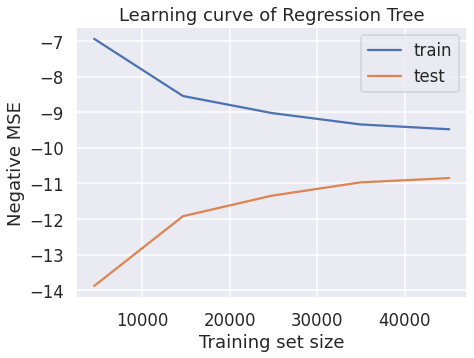

In [69]:
train_sizes, train_scores, test_scores = learning_curve(regr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='train');
plt.plot(train_sizes, test_scores_mean, label='test');
plt.title('Learning curve of Regression Tree');
plt.xlabel('Training set size');
plt.ylabel('Negative MSE');
plt.legend();

This is a very good learning curve. 

##Conclusion

From the project, we can conclude that Decision Tree Regression gave us the best result. It gave us a RMSE of 3.32. We got a RMSE of 3.70 from Linear Regression. We got a RMSE of 3.38 from KNN Regression. 
We got a really got curve by performing Decision Tree Regression, a decent curbe by KNN Regression, and Linear Regression gave us the worst learing curve.